In [2]:
import pandas as pd
import seaborn as sns

#from sklearn.neighbors import DistanceMetric
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#import os

In [3]:
#os.chdir(r"G:\My Drive\PUC-Rio\Trabalho final ADR - Bruno Fanzeres\Script") 

In [4]:
data_insurance = pd.read_csv(r"G:\My Drive\PUC-Rio\PUC-Rio 2022-1\Trabalho final ADR - Bruno Fanzeres\insurance.csv")

In [5]:
#Missing values computation
data_insurance.isnull().sum()

#Data nao tem missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data_insurance.columns.values.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [7]:
data_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
#data_insurance.describe()

categorical = pd.get_dummies(data_insurance[["sex","smoker", "region"]])

final_data = pd.concat([data_insurance[["age","bmi","children", "charges"]], categorical], axis =1)

In [9]:
scaler = RobustScaler()

final_data_scaled = pd.DataFrame(scaler.fit_transform(final_data), columns = final_data.columns.values.tolist())

final_data_scaled.describe()

#final_data["charges"] = np.log(final_data["charges"])

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.008626,0.031366,0.047459,0.326766,0.494768,-0.494768,-0.204783,0.204783,0.242152,0.242900,0.272048,0.242900
std,0.585415,0.726191,0.602746,1.017680,0.500160,0.500160,0.403694,0.403694,0.428546,0.428995,0.445181,0.428995
min,-0.875000,-1.719559,-0.500000,-0.694153,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.500000,-0.488687,-0.500000,-0.390075,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.511313,0.500000,0.609925,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.041667,2.706758,2.000000,4.570597,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#bins = [18, 30, 40, 50, 60]
#labels = ['18 to 30', '30 to 40', 'teen', 'adult', 'senior citizen']

pca = PCA(n_components=2)
pca.fit(final_data_scaled)

print(pca.explained_variance_ratio_)

components = pd.DataFrame(pca.transform(final_data_scaled), columns=['PC1','PC2'])

print("Total Varianza Explicada:")
print(pca.explained_variance_ratio_.sum()*100)

[0.34308876 0.1432343 ]
Total Varianza Explicada:
48.6323054565206


# KMeans Univariado

In [11]:
plt.style.use('bmh')

In [12]:
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(final_data_scaled[["charges"]])
    wcss.append(kmeans.inertia_)

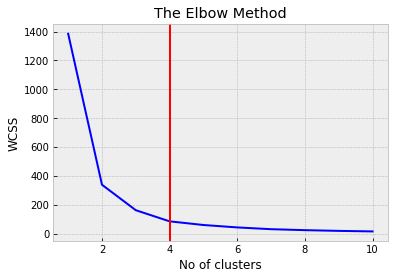

In [13]:
a = plt.plot(range(1,11), wcss, color='b')
plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.axvline(4, color='r') # vertical
#plt.savefig(path_fig+"\Elbowmethod.png")
plt.show()

In [14]:
#Model Build
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(final_data_scaled[["charges"]])

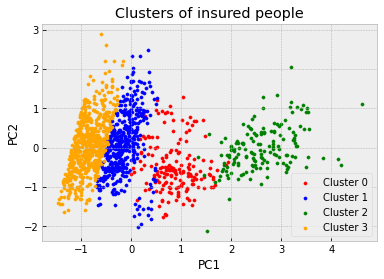

In [15]:
#Visualizing all the clusters 
#components = components.values

plt.scatter(components.values[y_kmeans == 0, 0], components.values[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 0')
plt.scatter(components.values[y_kmeans == 1, 0], components.values[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 1')
plt.scatter(components.values[y_kmeans == 2, 0], components.values[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 2')
plt.scatter(components.values[y_kmeans == 3, 0], components.values[y_kmeans == 3, 1], s = 10, c = 'orange', label = 'Cluster 3')
#las coordenadas del centro son unidimensionales
#plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters of insured people')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
#plt.savefig(path_fig+"\Clustering general.png")
plt.show()

In [16]:
cluster = pd.Series(y_kmeans, name="cluster")
final_descriptive = pd.concat([final_data, cluster], axis=1)
final_descriptive

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,cluster
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0,3
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0,3
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0,1
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0,3
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0,3
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1,3


In [17]:
# Activar para exportar la base con clusters univariados
final_descriptive.to_excel(r"G:\My Drive\PUC-Rio\PUC-Rio 2022-1\Trabalho final ADR - Bruno Fanzeres\Script\Database.xlsx")


<AxesSubplot:xlabel='charges', ylabel='Count'>

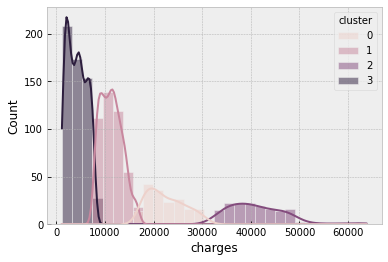

In [18]:
sns.histplot(data=final_descriptive, x="charges", kde=True, hue="cluster")

# Implementacion algoritmo KMeans

In [19]:
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(components)
    wcss.append(kmeans.inertia_)

In [20]:
path_fig = r"G:\My Drive\PUC-Rio\PUC-Rio 2022-1\Trabalho final ADR - Bruno Fanzeres\Script\Graphics\Data Analytics"

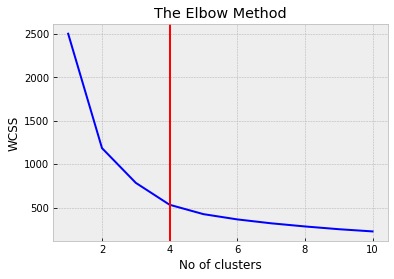

In [21]:
#Visualizing the ELBOW method to get the optimal value of K 
a = plt.plot(range(1,11), wcss, color='b')
plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.axvline(4, color='r') # vertical
plt.savefig(path_fig+"\Elbowmethod.png")
plt.show()

In [22]:
#Model Build
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(components)

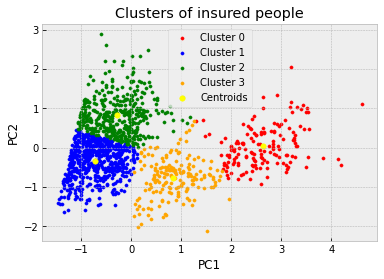

In [23]:
#Visualizing all the clusters 
#components = components.values

plt.scatter(components.values[y_kmeans == 0, 0], components.values[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 0')
plt.scatter(components.values[y_kmeans == 1, 0], components.values[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 1')
plt.scatter(components.values[y_kmeans == 2, 0], components.values[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 2')
plt.scatter(components.values[y_kmeans == 3, 0], components.values[y_kmeans == 3, 1], s = 10, c = 'orange', label = 'Cluster 3')
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters of insured people')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.savefig(path_fig+"\Clustering general.png")
plt.show()


In [24]:
cluster = pd.Series(y_kmeans, name="cluster")
cluster

0       3
1       2
2       2
3       3
4       1
       ..
1333    2
1334    1
1335    2
1336    1
1337    3
Name: cluster, Length: 1338, dtype: int32

In [25]:
final_descriptive = pd.concat([final_data, cluster], axis=1)
final_descriptive.columns.values.tolist()

['age',
 'bmi',
 'children',
 'charges',
 'sex_female',
 'sex_male',
 'smoker_no',
 'smoker_yes',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest',
 'cluster']

In [26]:
final_descriptive.groupby(cluster).describe().T

cluster                 0           1           2           3
age     count  152.000000  605.000000  403.000000  178.000000
        mean    40.546053   36.761983   42.615385   38.657303
        std     14.433147   13.391811   14.177568   14.005668
        min     18.000000   18.000000   18.000000   18.000000
        25%     27.750000   25.000000   31.000000   27.000000
...                   ...         ...         ...         ...
cluster min      0.000000    1.000000    2.000000    3.000000
        25%      0.000000    1.000000    2.000000    3.000000
        50%      0.000000    1.000000    2.000000    3.000000
        75%      0.000000    1.000000    2.000000    3.000000
        max      0.000000    1.000000    2.000000    3.000000

[104 rows x 4 columns]

In [27]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=final_data.columns)
loadings



,PC1,PC2
age,0.164747,0.081751
bmi,0.181790,0.892220
children,0.042879,0.000486
charges,0.875335,-0.133039
sex_female,-0.045044,-0.143177
sex_male,0.045044,0.143177
smoker_no,-0.286600,0.153147
smoker_yes,0.286600,-0.153147
region_northeast,-0.005255,-0.132091
region_northwest,-0.025020,-0.116941


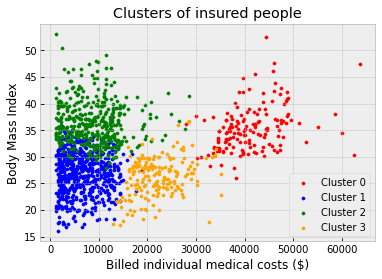

In [28]:
plt.scatter(final_descriptive.values[y_kmeans == 0, 3], final_descriptive.values[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 0')
plt.scatter(final_descriptive.values[y_kmeans == 1, 3], final_descriptive.values[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 1')
plt.scatter(final_descriptive.values[y_kmeans == 2, 3], final_descriptive.values[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 2')
plt.scatter(final_descriptive.values[y_kmeans == 3, 3], final_descriptive.values[y_kmeans == 3, 1], s = 10, c = 'orange', label = 'Cluster 3')
#plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters of insured people')
plt.xlabel('Billed individual medical costs ($)')
plt.ylabel('Body Mass Index')
plt.legend()
plt.savefig(path_fig+"\Scatterplot with clusters BMI.png")
plt.show()

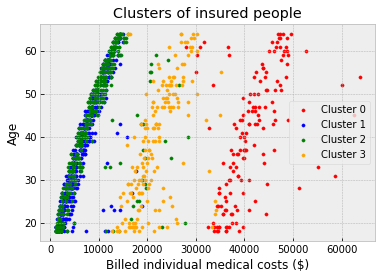

In [29]:
plt.scatter(final_descriptive.values[y_kmeans == 0, 3], final_descriptive.values[y_kmeans == 0, 0], s = 10, c = 'red', label = 'Cluster 0')
plt.scatter(final_descriptive.values[y_kmeans == 1, 3], final_descriptive.values[y_kmeans == 1, 0], s = 10, c = 'blue', label = 'Cluster 1')
plt.scatter(final_descriptive.values[y_kmeans == 2, 3], final_descriptive.values[y_kmeans == 2, 0], s = 10, c = 'green', label = 'Cluster 2')
plt.scatter(final_descriptive.values[y_kmeans == 3, 3], final_descriptive.values[y_kmeans == 3, 0], s = 10, c = 'orange', label = 'Cluster 3')
#plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters of insured people')
plt.xlabel('Billed individual medical costs ($)')
plt.ylabel('Age')
plt.legend()
plt.savefig(path_fig+"\Scatterplot with clusters Age.png")
plt.show()

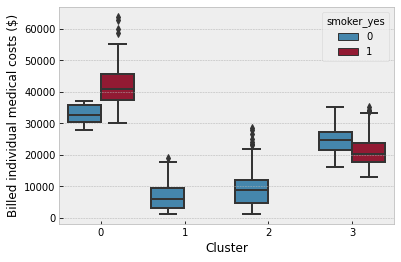

In [30]:
G1 = sns.boxplot(data=final_descriptive, y="charges", x="cluster", hue="smoker_yes")
G1.set_ylabel("Billed individual medical costs ($)")
G1.set_xlabel('Cluster')
plt.savefig(path_fig+"\Scatterplot with clusters Smoker.png")

Text(0.5, 0, 'Cluster')

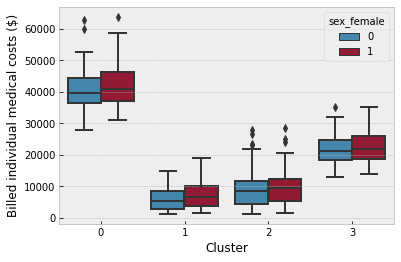

In [31]:
G1 = sns.boxplot(data=final_descriptive, y="charges", x="cluster", hue="sex_female")
G1.set_ylabel("Billed individual medical costs ($)")
G1.set_xlabel('Cluster')

In [32]:
final_descriptive = pd.concat([final_descriptive, data_insurance["region"]], axis = 1)

Text(0.5, 0, 'Cluster')

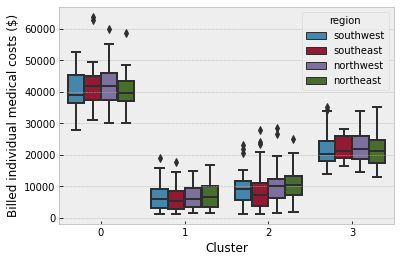

In [33]:
G1 = sns.boxplot(data=final_descriptive, y="charges", x="cluster", hue="region")
G1.set_ylabel("Billed individual medical costs ($)")
G1.set_xlabel('Cluster')

Text(0.5, 0, 'Cluster')

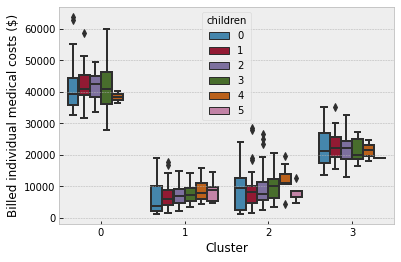

In [34]:
G1 = sns.boxplot(data=final_descriptive, y="charges", x="cluster", hue="children")
G1.set_ylabel("Billed individual medical costs ($)")
G1.set_xlabel('Cluster')

In [35]:
final_descriptive.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest', 'cluster', 'region'],
      dtype='object')

In [36]:
final_descriptive.cluster.value_counts()

1    605
2    403
3    178
0    152
Name: cluster, dtype: int64

In [37]:
# Fit Model & Output Regression Results Summary
# Import Package
#import statsmodels.api as sm
#from statsmodels.api import add_constant

In [38]:
#doubles = dict()

#for x in range(1, 13):
#    doubles[x] = x * 2

In [39]:
#lm_cluster = dict()

#for k in range(4):
#    exec(f'y_{k} = final_descriptive["charges"].loc[final_descriptive["cluster"]=={k}]')
    
#    exec(f'X_{k} = final_descriptive[["age", "bmi", "children", "sex_female", "sex_male", "smoker_no", "smoker_yes", "region_northeast", "region_northwest", "region_southeast", "region_southwest"]].loc[final_descriptive["cluster"]=={k}]')

#    exec(f'Xc_{k} = sm.add_constant(X_{k}, has_constant="add")')
#    exec(f'model_{k} = sm.OLS(y_{k},Xc_{k})')
#    exec(f'results_{k} = model_{k}.fit()')

    # Output Results
    #results.summary()


In [40]:
#results_3.summary()

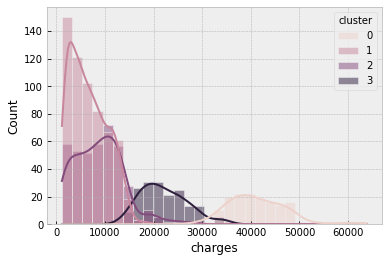

In [41]:
sns.histplot(data=final_descriptive, x="charges", kde=True, hue="cluster")
plt.savefig(path_fig+"\Density analysis of Billed individual medical costs ($).png")

In [42]:
#probability = final_descriptive.cluster.value_counts()/final_descriptive.shape[0]

#probability

naccidents = 12
#probability_accidents = np.ones((naccidents,1))*0.3
probability_accidents = 0.3

probability_accidents

#df = pd.DataFrame(columns=['Valor Indemnization', 'Had accident', 'Cluster'], index=range(final_descriptive.shape[0]))

## Simulation
n, p = 1, probability_accidents  # number of trials, probability of each trial
np.random.seed(0)
p

#SOLO FALTA ARREGLAR AQUI PARA HACER MATCH CON LOS CLUSTER


for N in range(4):
    #exec(f's_{N} = np.random.binomial(n, p[{N}], (final_descriptive.cluster.value_counts().iloc[{N}],12))')
    exec(f's_{N} = np.random.binomial(n, p, (final_descriptive.cluster.value_counts().iloc[{N}],12))')
    exec(f'print(s_{N}.shape)')
    #exec(f'df_{N} = pd.DataFrame(columns=["Valor Indemnization", "Had accident", "Cluster"], index=range(final_descriptive.cluster.value_counts().iloc[{N}]))')
    #exec(f'print(df_{N}.shape)')
    exec(f'print(s_{N}.mean())')
    
s_N = np.random.binomial(n, p, (final_descriptive.shape[0], 12))

df_N = pd.DataFrame(final_descriptive["charges"].values, columns = ["Indemnization Value"])

#### Hacemos el dataframe para la simulacion
sim = pd.concat([pd.DataFrame(s_0),pd.DataFrame(s_1),pd.DataFrame(s_2),pd.DataFrame(s_3)], ignore_index=True)

result1 = pd.concat([ pd.DataFrame(df_N.values*sim.values), final_descriptive["cluster"]], axis=1, join="inner")
## Simulacion para cada cluster


result2 = pd.concat([pd.DataFrame(df_N.values*s_N), final_descriptive["cluster"]], axis=1, join="inner")
## Simulacion para toda la base de datos

result1 = pd.concat([ pd.DataFrame(sim.values), final_descriptive["cluster"]], axis=1, join="inner")
result1.cluster.value_counts()

result1, result2

In [43]:
final_descriptive.cluster.value_counts()

1    605
2    403
3    178
0    152
Name: cluster, dtype: int64

In [44]:
#with pd.ExcelWriter(r"G:\My Drive\PUC-Rio\Trabalho final ADR - Bruno Fanzeres\Simulation.xlsx") as writer:  
#    result1.to_excel(writer, sheet_name='MatrixCluster4')
#    result2.to_excel(writer, sheet_name='MatrixTudo')

# Exportar Base de datos

<AxesSubplot:xlabel='charges', ylabel='Count'>

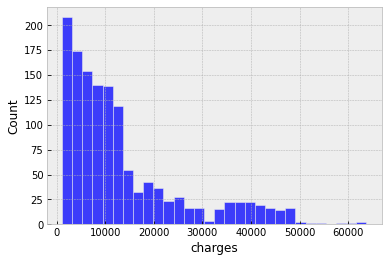

In [45]:
sns.histplot(final_descriptive["charges"])

In [46]:
#final_descriptive["charges"] = np.log(final_descriptive["charges"])
final_descriptive.to_excel(r"D:\IME Q2 - ADR Artigo\Insurance-Mathematics-Economics-ADR-\Database.xlsx")

<AxesSubplot:xlabel='charges', ylabel='Count'>

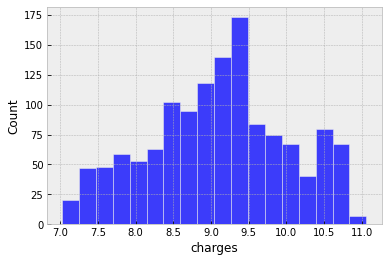

In [47]:
sns.histplot(data=np.log(final_descriptive["charges"]))

<AxesSubplot:xlabel='charges', ylabel='Count'>

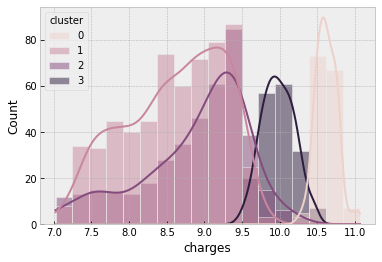

In [48]:
final_descriptive["charges"] = np.log(final_descriptive["charges"])
sns.histplot(data=final_descriptive, x="charges", kde=True, hue="cluster")

In [49]:
final_descriptive["charges"].std()

0.9195271129310933

In [50]:
np.log(final_descriptive["charges"]).std()

0.102547098808816